In [1]:
## Libraries
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
import pv_model_class


In [2]:
# Constants and variables

Iscn = 8.21 #8.7 # nominal short circuit current
Vocn = 32.9 #37.7 # nominal open circuit voltage
Imp = 7.61 #8.2 # array current at MPP
Vmp = 26.3 #30.1 # array voltage at MPP
Pmax_e = Vmp * Imp # experimental array max power output
Kv = -0.123 #-0.32/100 * Vocn # voltage temperature coefficient
Ki = 0.0032 #-0.032/100 * Iscn # current temperature coefficient
Ns = 54 #60. # number of series cells
Gn = 1000. # nominal irradiance
G = Gn
Tn = 25. + 273.15 # nominal operating temperature
T = Tn

Egap = 1.8 * 10 ** -19 # Bandgap of silicon (silicio cristalino)

err = 0.0001


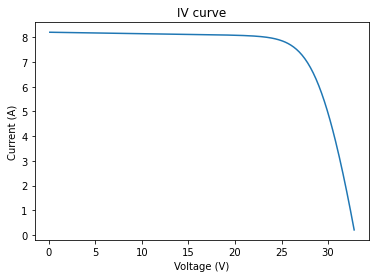

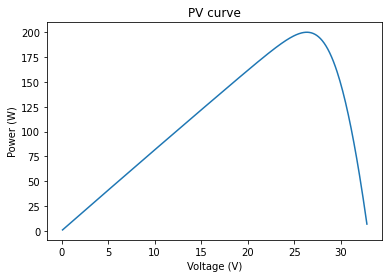

Maximum Power: 200.13356933546547
Maximum v, i: 26.300000000000004 , 7.609641419599446


In [3]:
# Nominal PV model

# initialize model object
pv_mod = pv_model_class.PvModel(Iscn, Vocn, Imp, Vmp, Kv, Ki, Ns, Gn, G, Tn, T, Egap, err)
# find resistor values and diode ideality constant
Rs, Rp, a = pv_mod.find_resistors()
# find voltage, current, and power arrays
v, i, P = pv_mod.calculate_power(Rs, Rp, a)

# plot IV and PV curves
pv_mod._plot(v, i, 'Voltage (V)', 'Current (A)', 'IV curve')
pv_mod._plot(v, P, 'Voltage (V)', 'Power (W)', 'PV curve')

# find maximum power point
P_max = np.argmax(P)
print('Maximum Power:', P[P_max])
print('Maximum v, i:', v[P_max],",",i[P_max])

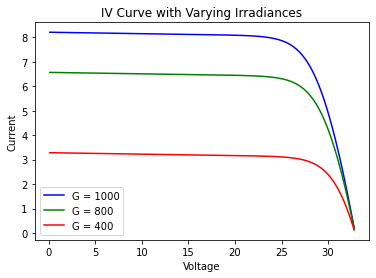

In [5]:
## Sensitivity analysis: Varying Irradiances

pv_mod_g1 = pv_model_class.PvModel(Iscn, Vocn, Imp, Vmp, Kv, Ki, Ns, Gn, 800, Tn, Tn, Egap, err)
pv_mod_g2 = pv_model_class.PvModel(Iscn, Vocn, Imp, Vmp, Kv, Ki, Ns, Gn, 400, Tn, Tn, Egap, err)
v_g1, i_g1, P_g1 = pv_mod_g1.calculate_power(Rs, Rp, a)
v_g2, i_g2, P_g2 = pv_mod_g2.calculate_power(Rs, Rp, a)

plt.plot(v, i, 'b', label='G = 1000')
plt.plot(v_g1, i_g1, 'g', label='G = 800')
plt.plot(v_g2, i_g2, 'r', label='G = 400')
plt.xlabel('Voltage')
plt.ylabel('Current')
plt.title('IV Curve with Varying Irradiances')
plt.legend()
plt.show()

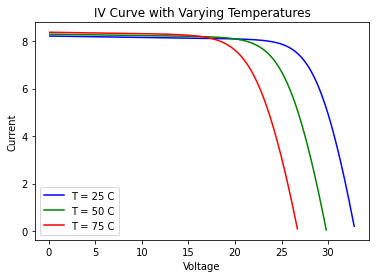

Maximum Power: 186.66119331499397
Maximum v, i: 23.300000000000004 , 7.576761635593981
Maximum Power: 164.0958458953288
Maximum v, i: 20.300000000000004 , 7.52079426408296


In [7]:
## Sensitivity analysis: Varying Temperatures

pv_mod_t1 = pv_model_class.PvModel(Iscn, Vocn, Imp, Vmp, Kv, Ki, Ns, Gn, Gn, Tn, 50 + 273.15, Egap, err)
pv_mod_t2 = pv_model_class.PvModel(Iscn, Vocn, Imp, Vmp, Kv, Ki, Ns, Gn, Gn, Tn, 75 + 273.15, Egap, err)
v_t1, i_t1, P_t1 = pv_mod_t1.calculate_power(Rs, Rp, a)
v_t2, i_t2, P_t2 = pv_mod_t2.calculate_power(Rs, Rp, a)

plt.plot(v, i, 'b', label='T = 25 C')
plt.plot(v_t1, i_t1, 'g', label='T = 50 C')
plt.plot(v_t2, i_t2, 'r', label='T = 75 C')
plt.xlabel('Voltage')
plt.ylabel('Current')
plt.title('IV Curve with Varying Temperatures')
plt.legend()
plt.show()

P_max = np.argmax(P_t1)
print('Maximum Power:', P[P_max])
print('Maximum v, i:', v_t1[P_max],",",i_t1[P_max])

P_max = np.argmax(P_t2)
print('Maximum Power:', P[P_max])
print('Maximum v, i:', v_t2[P_max],",",i_t2[P_max])